In [160]:
import pandas as pd

In [161]:
path = r'C:\Users\Raissa\Documentos\GitHub\Crédito_Bruxos\data\dados_consumo.xlsx'
df = pd.read_excel(
    path,
    sheet_name="Dados",
    usecols=[
    'Número do Contrato', 'Ano do Contrato', 'Casa do Bruxo',
    'Histórico de Crédito', 'Patrimônio do Cliente', 'Ocupação do Bruxo',
    'Risco do bruxo', 'Poder Aquisitivo do Bruxo', 'Origem da Venda',
    'Local da Venda', 'Tipo de Produto',
    'Valor da Renda do Bruxo', 'Valor da Parcela Contratado',
    'Valor do Financiamento', 'Marcação de Cliente Inadimplentes',
    'Quantidade de Contratos'
    ]
)
df

,Número do Contrato,Ano do Contrato,Casa do Bruxo,Histórico de Crédito,Patrimônio do Cliente,Ocupação do Bruxo,Risco do bruxo,Poder Aquisitivo do Bruxo,Origem da Venda,Local da Venda,Tipo de Produto,Valor da Renda do Bruxo,Valor da Parcela Contratado,Valor do Financiamento,Marcação de Cliente Inadimplentes,Quantidade de Contratos
0,1,1981,Grifinoria,04) Médio Risco,Sem Bens Significativos,Bruxos Regulares,04) Cauteloso,Nuqueiros,Gringots,Beco Diagonal,Varinha,26270.850,16175.325000,251123.775,0,1
1,4,1981,Grifinoria,04) Médio Risco,Colecionador Artefatos Mágicos,Bruxos Regulares,03) Crítico,Galeonários,Gringots,Beco Diagonal,Vassouras,113549.925,19881.732558,749925.000,0,1
2,14,1981,Grifinoria,01) Sem Histórico,Sem Bens Significativos,Bruxos Regulares,04) Cauteloso,Mofadores de Monstrons,Gringots,Beco Diagonal,Varinha,14607.000,4040.816327,300000.000,0,1
3,27,1981,Corvinal,03) Alto Risco,Sem Bens Significativos,Bruxos Regulares,03) Crítico,Nuqueiros,Gringots,Beco Diagonal,Varinha,33941.100,1467.108434,92250.000,0,1
4,33,1981,Grifinoria,05) Baixo Risco,Colecionador Artefatos Mágicos,Bruxos Regulares,04) Cauteloso,Mofadores de Monstrons,Gringots,Beco Diagonal,Varinha,18033.525,10842.965854,396930.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64882,64463,2000,Corvinal,01) Sem Histórico,Colecionador Artefatos Mágicos,Bruxos Regulares,03) Crítico,Galeonários,Ambulantes,Hogsmeade,Varinha,78712.500,12651.042857,381712.500,0,1
64883,64639,2000,Lufa Lufa,04) Médio Risco,Sem Bens Significativos,Bruxos Regulares,03) Crítico,Mofadores de Monstrons,Ambulantes,Hogsmeade,Varinha,9895.875,13162.146429,308621.250,0,1
64884,64677,2000,Grifinoria,05) Baixo Risco,Sem Bens Significativos,Bruxos Regulares,04) Cauteloso,Mofadores de Monstrons,Ambulantes,Hogsmeade,Varinha,12431.025,6237.613636,228712.500,0,1
64885,64732,2000,Lufa Lufa,03) Alto Risco,Sem Bens Significativos,Bruxos Regulares,02) Muito Crítico,Nuqueiros,Ambulantes,Hogsmeade,Varinha,19322.925,11475.300000,346237.500,0,1


In [162]:
import pandas as pd
import numpy as np

# garanta esses nomes (ajuste se precisar)
df = df.copy()
df['qt']  = df['Quantidade de Contratos'].clip(lower=1).astype(int)
df['inad'] = df['Marcação de Cliente Inadimplentes'].astype(int)

# baseline ponderado
base_bad = (df['inad']*df['qt']).sum() / df['qt'].sum()
print(f"Taxa base de inadimplência: {base_bad:.2%}  |  N contratos: {df['qt'].sum():,}")


Taxa base de inadimplência: 6.94%  |  N contratos: 64,887


Essa taxa representa a porcentagem de contratos inadimplentes, para ser usado como referência.

In [163]:
df.dtypes

Número do Contrato                     int64
Ano do Contrato                        int64
Casa do Bruxo                         object
Histórico de Crédito                  object
Patrimônio do Cliente                 object
Ocupação do Bruxo                     object
Risco do bruxo                        object
Poder Aquisitivo do Bruxo             object
Origem da Venda                       object
Local da Venda                        object
Tipo de Produto                       object
Valor da Renda do Bruxo              float64
Valor da Parcela Contratado          float64
Valor do Financiamento               float64
Marcação de Cliente Inadimplentes      int64
Quantidade de Contratos                int64
qt                                     int64
inad                                   int64
dtype: object

In [164]:
import pandas as pd

def inadimplencia_por(
    df: pd.DataFrame,
    grupo,                                # string ou lista de strings
    col_inad='Marcação de Cliente Inadimplentes',
    col_qt='Quantidade de Contratos',
    min_qt: int = 0,                      # filtra grupos com poucos contratos
    ordenar_por: str = 'inadimplencia',   # ou 'contratos'
    asc: bool = False
) -> pd.DataFrame:
    if isinstance(grupo, str):
        grupo = [grupo]

    x = df.copy()
    x[col_qt] = pd.to_numeric(x[col_qt], errors='coerce').fillna(1)
    x[col_inad] = (x[col_inad] == 1).astype(int)
    x['_w_bad'] = x[col_inad] * x[col_qt]

    g = x.groupby(grupo, dropna=False)
    out = g.agg(
        contratos=(col_qt, 'sum'),
        inadimplentes=('_w_bad', 'sum')
    ).reset_index()

    out['inadimplencia'] = out['inadimplentes'] / out['contratos'] * 100
    if min_qt > 0:
        out = out[out['contratos'] >= min_qt]
    return out.sort_values(ordenar_por, ascending=asc)


In [165]:
col_inad = 'Marcação de Cliente Inadimplentes'
col_qt   = 'Quantidade de Contratos'

base = (df[col_inad] * df[col_qt]).sum() / df[col_qt].sum()
print(f"Taxa base de inadimplência (ponderada): {base:.2%}")


Taxa base de inadimplência (ponderada): 6.94%


In [166]:
# Por uma dimensão
tab_origem = inadimplencia_por(df, 'Origem da Venda', min_qt=50)
tab_prod   = inadimplencia_por(df, 'Tipo de Produto', min_qt=50)
tab_local  = inadimplencia_por(df, 'Local da Venda', min_qt=50)
tab_hist_cred  = inadimplencia_por(df, 'Histórico de Crédito', min_qt=50)
tab_patrimonio  = inadimplencia_por(df, 'Patrimônio do Cliente', min_qt=50)
tab_ocupacao  = inadimplencia_por(df, 'Ocupação do Bruxo', min_qt=50)
tab_risco  = inadimplencia_por(df, 'Risco do bruxo', min_qt=50)
tab_poder_aq  = inadimplencia_por(df, 'Poder Aquisitivo do Bruxo', min_qt=50)

display(tab_origem, tab_prod, tab_local, tab_hist_cred, tab_patrimonio, tab_ocupacao, tab_risco, tab_poder_aq)



,Origem da Venda,contratos,inadimplentes,inadimplencia
0,Ambulantes,36309,3337,9.190559
1,Gringots,28578,1168,4.087060


,Tipo de Produto,contratos,inadimplentes,inadimplencia
0,Varinha,48933,3812,7.790244
1,Vassouras,15954,693,4.343738


,Local da Venda,contratos,inadimplentes,inadimplencia
2,Travessa do Tranco,8990,1272,14.149055
1,Hogsmeade,15843,1278,8.066654
0,Beco Diagonal,40054,1955,4.880911


,Histórico de Crédito,contratos,inadimplentes,inadimplencia
1,02) Atraso Recente,13079,2031,15.528710
0,01) Sem Histórico,5905,532,9.009314
2,03) Alto Risco,9282,784,8.446456
3,04) Médio Risco,12803,649,5.069124
4,05) Baixo Risco,23818,509,2.137039


,Patrimônio do Cliente,contratos,inadimplentes,inadimplencia
2,Sem Bens Significativos,51707,4194,8.111087
0,Colecionador Artefatos Mágicos,6721,237,3.526261
1,Possui Reliquias da Morte,6459,74,1.145688


,Ocupação do Bruxo,contratos,inadimplentes,inadimplencia
2,Comerciantes do Beco,4528,422,9.319788
1,Bruxos Regulares,44168,3490,7.901648
0,Aurors,7314,354,4.840033
4,Professores de Hogwarts,5576,180,3.228121
3,Funcionarios do Ministerio da Magia,3301,59,1.787337


,Risco do bruxo,contratos,inadimplentes,inadimplencia
0,01) Foragido,6688,1332,19.916268
1,02) Muito Crítico,6957,963,13.842173
2,03) Crítico,22561,1674,7.419884
3,04) Cauteloso,14637,387,2.643984
4,05) Seguro,9259,123,1.328437
5,06) Muito Seguro,4785,26,0.543365


,Poder Aquisitivo do Bruxo,contratos,inadimplentes,inadimplencia
2,Mofadores de Monstrons,22225,2312,10.402700
3,Nuqueiros,17635,1068,6.056138
0,Aristomágicos,12373,577,4.663380
1,Galeonários,12654,548,4.330646


In [167]:
col_inad = 'Marcação de Cliente Inadimplentes'
col_qt   = 'Quantidade de Contratos'

taxa_base_pct = ((df[col_inad] * df[col_qt]).sum() / df[col_qt].sum()) * 100
print(f"Taxa base de inadimplência (ponderada) = {taxa_base_pct:.2f}%")


Taxa base de inadimplência (ponderada) = 6.94%


In [168]:
import pandas as pd

def filtra_acima_base(
    tab: pd.DataFrame,
    base_pct: float,
    col_taxa: str = 'inadimplencia',
    col_volume: str = 'contratos',
    min_contratos: int = 0
) -> pd.DataFrame:
    """
    Filtra linhas com taxa > base (tudo em %), adiciona delta (p.p.) e lift.
    Ordena pelos piores (taxa) e, em empate, por volume.
    """
    out = tab.copy()
    if min_contratos > 0 and col_volume in out.columns:
        out = out[out[col_volume] >= min_contratos]
    out = out[out[col_taxa] > base_pct].copy()
    out['delta_pp'] = out[col_taxa] - base_pct
    out['lift_vs_base'] = out[col_taxa] / base_pct
    cols_ordem = [c for c in out.columns if c not in ('delta_pp','lift_vs_base')] + ['delta_pp','lift_vs_base']
    return out.sort_values([col_taxa, col_volume], ascending=[False, False])[cols_ordem]


In [169]:
tabelas = {
    'Origem da Venda': tab_origem,
    'Tipo de Produto': tab_prod,
    'Local da Venda': tab_local,
    'Histórico de Crédito': tab_hist_cred,
    'Patrimônio do Cliente': tab_patrimonio,
    'Ocupação do Bruxo': tab_ocupacao,
    'Risco do bruxo': tab_risco,
    'Poder Aquisitivo do Bruxo': tab_poder_aq,
}

filtradas = {nome: filtra_acima_base(tab, taxa_base_pct, min_contratos=50)
             for nome, tab in tabelas.items()}

# visualizar
for nome, tab in filtradas.items():
    print(f"\n=== {nome} (acima da base {taxa_base_pct:.2f}%) ===")
    display(tab)



=== Origem da Venda (acima da base 6.94%) ===


,Origem da Venda,contratos,inadimplentes,inadimplencia,delta_pp,lift_vs_base
0,Ambulantes,36309,3337,9.190559,2.24772,1.323746



=== Tipo de Produto (acima da base 6.94%) ===


,Tipo de Produto,contratos,inadimplentes,inadimplencia,delta_pp,lift_vs_base
0,Varinha,48933,3812,7.790244,0.847405,1.122054



=== Local da Venda (acima da base 6.94%) ===


,Local da Venda,contratos,inadimplentes,inadimplencia,delta_pp,lift_vs_base
2,Travessa do Tranco,8990,1272,14.149055,7.206215,2.037935
1,Hogsmeade,15843,1278,8.066654,1.123815,1.161867



=== Histórico de Crédito (acima da base 6.94%) ===


,Histórico de Crédito,contratos,inadimplentes,inadimplencia,delta_pp,lift_vs_base
1,02) Atraso Recente,13079,2031,15.528710,8.585871,2.236651
0,01) Sem Histórico,5905,532,9.009314,2.066475,1.297641
2,03) Alto Risco,9282,784,8.446456,1.503616,1.216571



=== Patrimônio do Cliente (acima da base 6.94%) ===


,Patrimônio do Cliente,contratos,inadimplentes,inadimplencia,delta_pp,lift_vs_base
2,Sem Bens Significativos,51707,4194,8.111087,1.168248,1.168267



=== Ocupação do Bruxo (acima da base 6.94%) ===


,Ocupação do Bruxo,contratos,inadimplentes,inadimplencia,delta_pp,lift_vs_base
2,Comerciantes do Beco,4528,422,9.319788,2.376949,1.34236
1,Bruxos Regulares,44168,3490,7.901648,0.958809,1.13810



=== Risco do bruxo (acima da base 6.94%) ===


,Risco do bruxo,contratos,inadimplentes,inadimplencia,delta_pp,lift_vs_base
0,01) Foragido,6688,1332,19.916268,12.973429,2.868606
1,02) Muito Crítico,6957,963,13.842173,6.899334,1.993734
2,03) Crítico,22561,1674,7.419884,0.477045,1.068710



=== Poder Aquisitivo do Bruxo (acima da base 6.94%) ===


,Poder Aquisitivo do Bruxo,contratos,inadimplentes,inadimplencia,delta_pp,lift_vs_base
2,Mofadores de Monstrons,22225,2312,10.4027,3.459861,1.498335


In [170]:
col_inad = 'Marcação de Cliente Inadimplentes'
col_qt   = 'Quantidade de Contratos'
taxa_base_pct = ((df[col_inad] * df[col_qt]).sum() / df[col_qt].sum()) * 100
print(f"Taxa base de inadimplência (ponderada) = {taxa_base_pct:.2f}%")


Taxa base de inadimplência (ponderada) = 6.94%


In [171]:
import pandas as pd
import matplotlib.pyplot as plt

def filtra_acima_base(
    tab: pd.DataFrame,
    base_pct: float,
    col_taxa: str = 'inadimplencia',
    col_volume: str = 'contratos',
    min_contratos: int = 0
) -> pd.DataFrame:
    out = tab.copy()
    if min_contratos > 0 and col_volume in out.columns:
        out = out[out[col_volume] >= min_contratos]
    out = out[out[col_taxa] > base_pct].copy()
    out['delta_pp'] = out[col_taxa] - base_pct
    out['lift_vs_base'] = out[col_taxa] / base_pct
    return out

def build_ranking_acima_base(tabelas: dict, base_pct: float, min_contratos: int = 50) -> pd.DataFrame:
    frames = []
    for nome_dim, tab in tabelas.items():
        if tab.empty: 
            continue
        # primeira coluna é o "grupo"
        col_grp = tab.columns[0]
        f = filtra_acima_base(tab, base_pct, min_contratos=min_contratos).copy()
        if f.empty:
            continue
        f.insert(0, 'dimensao', nome_dim)
        f.rename(columns={col_grp: 'grupo'}, inplace=True)
        f['grupo'] = f['grupo'].astype(str).fillna('(NaN)')
        frames.append(f[['dimensao','grupo','contratos','inadimplentes','inadimplencia','delta_pp','lift_vs_base']])

    if not frames:
        return pd.DataFrame(columns=['rank','dimensao','grupo','contratos','inadimplentes','inadimplencia','delta_pp','lift_vs_base'])

    rank = pd.concat(frames, ignore_index=True)
    rank = rank.sort_values(['lift_vs_base','contratos'], ascending=[False, False]).reset_index(drop=True)
    rank.insert(0, 'rank', rank.index + 1)
    return rank


In [172]:
tabelas = {
    'Origem da Venda': tab_origem,
    'Tipo de Produto': tab_prod,
    'Local da Venda': tab_local,
    'Histórico de Crédito': tab_hist_cred,
    'Patrimônio do Cliente': tab_patrimonio,
    'Ocupação do Bruxo': tab_ocupacao,
    'Risco do bruxo': tab_risco,
    'Poder Aquisitivo do Bruxo': tab_poder_aq,
}

rank = build_ranking_acima_base(tabelas, taxa_base_pct, min_contratos=50)
# display(rank.head(20))
print(f"\nTotal de segmentos acima da base: {len(rank)}")
rank.to_csv(r'C:\Users\Raissa\Documentos\GitHub\Crédito_Bruxos\output\rank_maiores_taxas_inadimplencias.csv')


Total de segmentos acima da base: 14


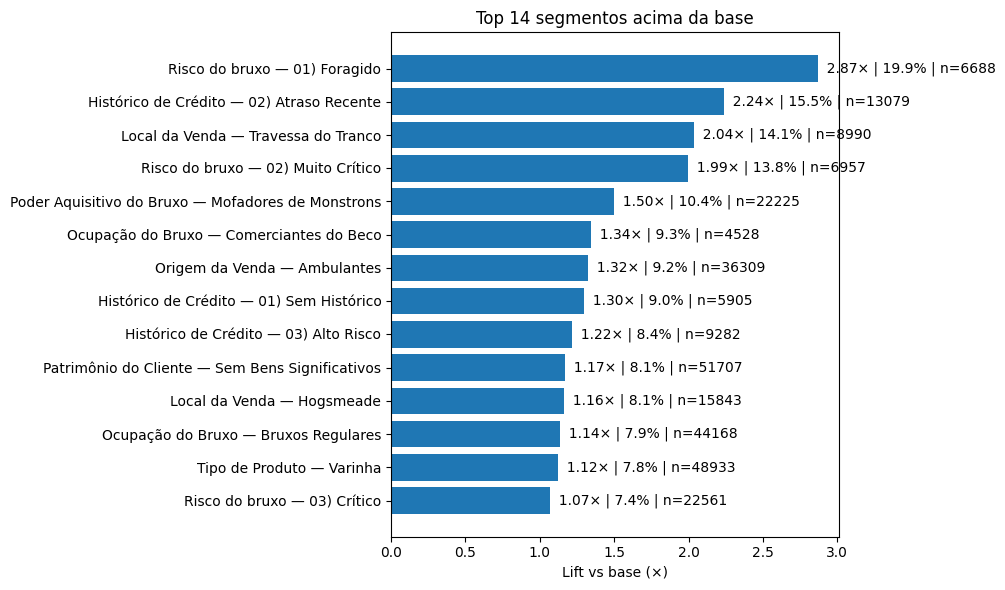

In [173]:
def plot_top_lift(rank_df: pd.DataFrame, top: int = 20):
    topdf = rank_df.head(top).copy()
    if topdf.empty:
        print("Sem segmentos acima da base para plotar.")
        return
    labels = (topdf['dimensao'] + ' — ' + topdf['grupo'].astype(str)).tolist()
    x = topdf['lift_vs_base'].values
    y_pos = range(len(topdf))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(y_pos, x)
    ax.set_yticks(y_pos); ax.set_yticklabels(labels)
    ax.invert_yaxis()
    ax.set_xlabel('Lift vs base (×)')
    ax.set_title(f'Top {len(topdf)} segmentos acima da base')

    # anotações: lift, taxa %, n
    for i, (lift, taxa, n) in enumerate(zip(topdf['lift_vs_base'], topdf['inadimplencia'], topdf['contratos'])):
        ax.text(lift, i, f'  {lift:.2f}× | {taxa:.1f}% | n={int(n)}', va='center')

    plt.tight_layout(); plt.show()

plot_top_lift(rank, top=20)


In [174]:
import pandas as pd
import numpy as np

# --------- Parâmetros ---------
COL_BAD = 'Marcação de Cliente Inadimplentes'
COL_QT  = 'Quantidade de Contratos'
DIMENSOES = [
    'Origem da Venda', 'Local da Venda', 'Tipo de Produto',
    'Histórico de Crédito', 'Patrimônio do Cliente',
    'Ocupação do Bruxo', 'Risco do bruxo', 'Poder Aquisitivo do Bruxo'
]
DIMENSOES = [c for c in DIMENSOES if c in df.columns]  # garante que existem
MIN_QT = 50
K_SHRINK = 500
THRESHOLDS = (1.10, 1.50)  # lift para Médio e Alto

# --------- Utilidades ---------
def taxa_base_pct(d: pd.DataFrame) -> float:
    return 100 * ((d[COL_BAD] * d[COL_QT]).sum() / d[COL_QT].sum())

def tabela_segmento(d: pd.DataFrame, col: str, k_shrink=500, min_qt=50) -> pd.DataFrame:
    x = d.copy()
    x['_w_bad'] = x[COL_BAD] * x[COL_QT]
    g = x.groupby(col, dropna=False).agg(contratos=(COL_QT,'sum'),
                                         inadimplentes=('_w_bad','sum'))
    g = g[g['contratos'] > 0]
    base = (x[COL_BAD]*x[COL_QT]).sum() / x[COL_QT].sum()
    g['taxa'] = g['inadimplentes'] / g['contratos']
    g['lift'] = g['taxa'] / base
    g['peso_shrink'] = g['contratos'] / (g['contratos'] + k_shrink)
    g['lift_shrunk'] = 1 + (g['lift'] - 1) * g['peso_shrink']
    g = g[g['contratos'] >= min_qt].copy()
    g['taxa_pct'] = 100 * g['taxa']
    g['base_pct'] = 100 * base
    return g.reset_index()

def dicionario_lifts(d: pd.DataFrame, cols, k_shrink=500, min_qt=50):
    lifts_map, meta_map = {}, {}
    for c in cols:
        tab = tabela_segmento(d, c, k_shrink=k_shrink, min_qt=min_qt)
        lifts_map[c] = dict(zip(tab[c], tab['lift_shrunk']))
        meta_map[c]  = {row[c]: {'contratos': int(row['contratos']),
                                 'taxa_%': float(row['taxa_pct'])}
                        for _, row in tab.iterrows()}
    return lifts_map, meta_map

def classificar_risco(escolhas: dict, lifts_map: dict, base_pct: float, thresholds=(1.10,1.50)):
    lift = 1.0
    detalhes = []
    for col, val in escolhas.items():
        l = lifts_map.get(col, {}).get(val, 1.0)  # neutro se não achou
        lift *= l
        detalhes.append({'coluna': col, 'categoria': val, 'lift': l})
    taxa_prevista = base_pct * lift
    risco = 'Alto' if lift >= thresholds[1] else ('Médio' if lift >= thresholds[0] else 'Baixo')
    return {'risco': risco, 'lift': lift, 'taxa_prevista_%': taxa_prevista,
            'base_%': base_pct, 'detalhes': detalhes}

# --------- Interface via console ---------
def perguntar_opcao(rotulo, opcoes):
    print(f"\n{rotulo}:")
    for i, o in enumerate(opcoes, 1):
        print(f"  {i}. {o}")
    s = input("Escolha o número (ENTER para pular): ").strip()
    if s == "": 
        return None
    try:
        idx = int(s)
        if 1 <= idx <= len(opcoes):
            return opcoes[idx-1]
    except:
        pass
    print("Entrada inválida. Pulando.")
    return None

def rodar_classificacao():
    base_pct = taxa_base_pct(df)
    lifts_map, meta_map = dicionario_lifts(df, DIMENSOES, k_shrink=K_SHRINK, min_qt=MIN_QT)

    escolhas = {}
    for col in DIMENSOES:
        opcoes = sorted(meta_map.get(col, {}).keys())
        if not opcoes:
            continue
        val = perguntar_opcao(col, opcoes)
        if val is not None:
            escolhas[col] = val

    if not escolhas:
        print("Nenhuma categoria escolhida.")
        return

    res = classificar_risco(escolhas, lifts_map, base_pct, thresholds=THRESHOLDS)
    print("\n===== Resultado =====")
    print(f"Risco: {res['risco']}")
    print(f"Base: {res['base_%']:.2f}% | Lift combinado: {res['lift']:.2f}x | Taxa prevista: {res['taxa_prevista_%']:.2f}%")
    det = pd.DataFrame(res['detalhes'])
    det['lift'] = det['lift'].map(lambda x: round(x,3))
    display(det)



In [175]:
# --- Régua de classificação por porcentagem (%)
CLASS_BINS  = [0, 2, 5, 10, 20, 100]   # limites em %
CLASS_LABELS = ["Muito baixa", "Baixa", "Média", "Alta", "Muito alta"]

def classificar_por_taxa_pct(taxa_pct: float) -> str:
    """
    Classifica a taxa (em %) nas faixas acima.
    Regra de borda: 20% entra em 'Muito alta'.
    """
    if taxa_pct < CLASS_BINS[1]:  # <2
        return CLASS_LABELS[0]
    elif taxa_pct < CLASS_BINS[2]:  # [2,5)
        return CLASS_LABELS[1]
    elif taxa_pct < CLASS_BINS[3]:  # [5,10)
        return CLASS_LABELS[2]
    elif taxa_pct < CLASS_BINS[4]:  # [10,20)
        return CLASS_LABELS[3]
    else:                           # >=20
        return CLASS_LABELS[4]

# --- Atualize sua função classificar_risco para incluir a classificação por taxa
def classificar_risco(escolhas: dict, lifts_map: dict, base_pct: float, thresholds=(1.10,1.50)):
    """
    Combina lifts das escolhas (multiplicando) e devolve:
    - risco (Baixo/Médio/Alto) pelo lift (mesma regra de antes),
    - taxa_prevista_% (truncada em 0–100%),
    - classificacao_por_taxa (Muito baixa ... Muito alta).
    """
    lift = 1.0
    detalhes = []
    for col, val in escolhas.items():
        l = lifts_map.get(col, {}).get(val, 1.0)  # neutro (=1) se não achar
        lift *= l
        detalhes.append({'coluna': col, 'categoria': val, 'lift': l})

    taxa_prevista_raw = base_pct * lift          # pode estourar >100
    taxa_prevista_pct = float(np.clip(taxa_prevista_raw, 0.0, 100.0))  # truncar 0–100

    # rótulo por lift (como antes)
    risco = 'Alto' if lift >= thresholds[1] else ('Médio' if lift >= thresholds[0] else 'Baixo')
    # rótulo por porcentagem
    classe_pct = classificar_por_taxa_pct(taxa_prevista_pct)

    return {
        'risco': risco,
        'lift': lift,
        'taxa_prevista_%': taxa_prevista_pct,
        'taxa_prevista_raw_%': taxa_prevista_raw,  # só p/ transparência
        'base_%': base_pct,
        'classificacao_por_taxa': classe_pct,
        'detalhes': detalhes
    }

# --- (Opcional) ajuste no print da sua função rodar_classificacao(), só para exibir a nova informação
def rodar_classificacao():
    base_pct = taxa_base_pct(df)
    lifts_map, meta_map = dicionario_lifts(df, DIMENSOES, k_shrink=K_SHRINK, min_qt=MIN_QT)

    escolhas = {}
    for col in DIMENSOES:
        opcoes = sorted(meta_map.get(col, {}).keys())
        if not opcoes:
            continue
        val = perguntar_opcao(col, opcoes)
        if val is not None:
            escolhas[col] = val

    if not escolhas:
        print("Nenhuma categoria escolhida.")
        return

    res = classificar_risco(escolhas, lifts_map, base_pct, thresholds=THRESHOLDS)

    print("\n===== Resultado =====")
    print(f"Risco (por lift): {res['risco']}  |  Lift combinado: {res['lift']:.2f}x")
    print(f"Base: {res['base_%']:.2f}%  |  Taxa prevista (truncada): {res['taxa_prevista_%']:.2f}%"
          + (f"  [raw: {res['taxa_prevista_raw_%']:.2f}%]" if res['taxa_prevista_raw_%'] != res['taxa_prevista_%'] else ""))
    print(f"Classificação por %: {res['classificacao_por_taxa']}")

    det = pd.DataFrame(res['detalhes'])
    det['lift'] = det['lift'].map(lambda x: round(x,3))
    display(det)

rodar_classificacao()


Origem da Venda:
  1. Ambulantes
  2. Gringots

Local da Venda:
  1. Beco Diagonal
  2. Hogsmeade
  3. Travessa do Tranco

Tipo de Produto:
  1. Varinha
  2. Vassouras

Histórico de Crédito:
  1. 01) Sem Histórico
  2. 02) Atraso Recente
  3. 03) Alto Risco
  4. 04) Médio Risco
  5. 05) Baixo Risco

Patrimônio do Cliente:
  1. Colecionador Artefatos Mágicos
  2. Possui Reliquias da Morte
  3. Sem Bens Significativos

Ocupação do Bruxo:
  1. Aurors
  2. Bruxos Regulares
  3. Comerciantes do Beco
  4. Funcionarios do Ministerio da Magia
  5. Professores de Hogwarts

Risco do bruxo:
  1. 01) Foragido
  2. 02) Muito Crítico
  3. 03) Crítico
  4. 04) Cauteloso
  5. 05) Seguro
  6. 06) Muito Seguro

Poder Aquisitivo do Bruxo:
  1. Aristomágicos
  2. Galeonários
  3. Mofadores de Monstrons
  4. Nuqueiros

===== Resultado =====
Risco (por lift): Alto  |  Lift combinado: 39.95x
Base: 6.94%  |  Taxa prevista (truncada): 100.00%  [raw: 277.38%]
Classificação por %: Muito alta


,coluna,categoria,lift
0,Origem da Venda,Ambulantes,1.319
1,Local da Venda,Travessa do Tranco,1.983
2,Tipo de Produto,Varinha,1.121
3,Histórico de Crédito,02) Atraso Recente,2.191
4,Patrimônio do Cliente,Sem Bens Significativos,1.167
5,Ocupação do Bruxo,Comerciantes do Beco,1.308
6,Risco do bruxo,01) Foragido,2.739
7,Poder Aquisitivo do Bruxo,Mofadores de Monstrons,1.487
